In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scikitplot as skplt
from sklearn.decomposition import PCA

In [2]:
# Reading of the training and testing dataset
train_df = pd.read_csv('../processed_data/train.csv')
train_df = train_df.drop(train_df.columns[0], axis=1)
train_df = train_df.drop(['ITEM_COUNT','PURCHASEID_hash','COUPON_ID_hash'], axis = 1)       
test_df = pd.read_csv('../processed_data/test.csv')
test_df = test_df.drop(test_df.columns[0], axis=1)
Coupons = list(test_df['COUPON_ID_hash'])
test_df = test_df.drop('COUPON_ID_hash', axis = 1)

In [3]:
# Altering the training dataset

# Altering the large area name 
large_area_name = list(set(train_df['large_area_name']))
# Altering the small area name 
small_area_name = list(set(train_df['small_area_name']))
# Altering the ken area name 
ken_name = list(set(train_df['ken_name']))
# Altering the genre name 
genre_name = list(set(train_df['GENRE_NAME']))

In [4]:
# Altering the large area name 
large_area_name = list(set(train_df['large_area_name']))
for area_name in large_area_name:
	train_df = train_df.replace(to_replace = area_name, value = large_area_name.index(area_name))

# Altering the small area name 
small_area_name = list(set(train_df['small_area_name']))
for area_name in small_area_name:
	train_df = train_df.replace(to_replace = area_name, value = small_area_name.index(area_name))

 # Altering the ken area name 
ken_name = list(set(train_df['ken_name']))
for area_name in ken_name:
	train_df = train_df.replace(to_replace = area_name, value = ken_name.index(area_name))


# Altering the genre name 
genre_name = list(set(train_df['GENRE_NAME']))
for name in genre_name:
	train_df = train_df.replace(to_replace = name, value = genre_name.index(name))


X = train_df.drop('USER_ID_hash', axis = 1)
Y = train_df['USER_ID_hash']

In [5]:
# Altering the testing dataset

# Altering the large area name
for area_name in large_area_name:
	test_df = test_df.replace(to_replace = area_name, value = large_area_name.index(area_name))

# Altering the small area name
for area_name in small_area_name:
	test_df = test_df.replace(to_replace = area_name, value = small_area_name.index(area_name))

# Altering the ken area name
for area_name in ken_name:
	test_df = test_df.replace(to_replace = area_name, value = ken_name.index(area_name))

# Altering the genre name 
for name in genre_name:
	test_df = test_df.replace(to_replace = name, value = genre_name.index(name))

In [6]:
DT = pickle.load(open('../Trained_Classifiers/decision_tree.sav', 'rb'))

/Users/utkarsh/anaconda2/lib/python2.7/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


starting the plot....


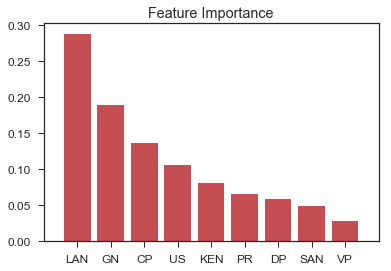

ending the plot....


In [16]:
sns.set(style="ticks", color_codes=True)
print 'starting the plot....'
skplt.estimators.plot_feature_importances(DT,feature_names=['GN','PR','CP','DP','VP','US','LAN','KEN','SAN'])
plt.show()
print 'ending the plot....'


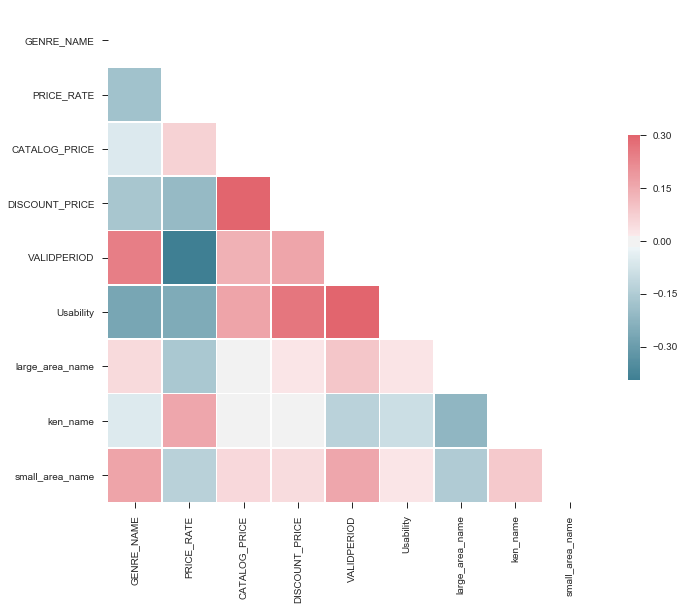

In [17]:
# Compute the correlation matrix
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()